<a href="https://colab.research.google.com/github/AftabUdaipurwala/MLProjects/blob/main/Real_Estate_Price_Prediction_oF_Bangalore_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/py-master/DataScience/BangloreHomePrices/model/'

banglore_home_prices_final.ipynb   columns.json
banglore_home_prices_model.pickle  hebbal_outliers.png
bengaluru_house_prices.csv	   rajaji_nagar_outliers.png


In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

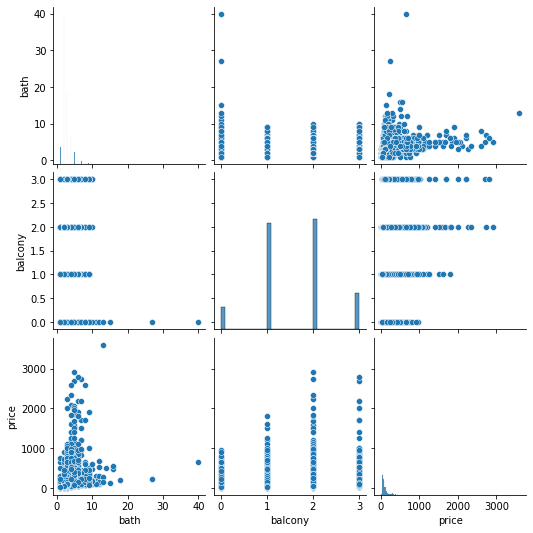

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
# examining the data for area type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [9]:
# assuming these columns are not important hence dropping them out

df1= df.drop(['availability','area_type','society','balcony'], axis=1)

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1 = df1.dropna()

In [13]:
df1.shape

(13246, 5)

In [14]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df1.groupby('size')['size'].agg('count')

size
1 BHK          531
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5198
2 Bedroom      329
27 BHK           1
3 BHK         4286
3 Bedroom      546
4 BHK          577
4 Bedroom      818
43 Bedroom       1
5 BHK           57
5 Bedroom      296
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [16]:
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df1.groupby('bhk')['bhk'].agg('count')

bhk
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [18]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [21]:
df1[~df1['total_sqft'].apply(is_float)].shape # this has 190 rows where area is given in range, now we need to take average of that range

(190, 6)

In [22]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
import re

def convert_range_to_average(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+float(tokens[1]))/2
  else:
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', x)
    if new_string =='Perch':
      x=float(re.sub("\D", "", x))
      x=x*272.25
      return float(x)
    elif new_string =='.Sq. Meter':
      x=float(re.sub("\D", "", x))/100
      x=x*10.7639
      return float(x)
    elif new_string =='Sq. Meter':
      x=float(re.sub("\D", "", x))
      x=x*10.7639
      return float(x)
    elif new_string =='Sq. Yards':
      x=float(re.sub("\D", "", x))
      x=x*9
      return float(x)
    elif new_string =='.Sq. Yards':
      x=float(re.sub("\D", "", x))
      x=x*9/100
      return float(x)
    elif new_string =='.Acres':
      x=float(re.sub("\D", "", x))
      x=x*43560/10
    elif new_string =='Acres':
      x=float(re.sub("\D", "", x))
      x=x*43560
      return float(x)
    try:
      isinstance(float(x), float)==True
      return float(x)
    except:
      return None

In [24]:
convert_range_to_average('1000Perch')

272250.0

In [25]:
df1['TotalSqftAct']= df1['total_sqft'].apply(convert_range_to_average)

In [26]:
df1.head()

,location,size,total_sqft,bath,price,bhk,TotalSqftAct
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [27]:
df1.isna().sum()

location        0
size            0
total_sqft      0
bath            0
price           0
bhk             0
TotalSqftAct    5
dtype: int64

In [28]:
df1= df1.dropna()

In [29]:
df1= df1.drop(['total_sqft'], axis=1)

# Feature *Engineering* ***italicized text***

In [30]:
# Create price per sqft column

In [31]:
df2 = df1.copy() # creating a copy

In [32]:
df2['Pricepersqft']=df2['price']*100000/df2['TotalSqftAct']

In [33]:
df2.head()

,location,size,bath,price,bhk,TotalSqftAct,Pricepersqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [34]:
len(df2.location.unique())

1303

In [35]:
df2.location = df2.location.apply(lambda x:x.strip())
location_stat = df2.groupby('location')['location'].agg('count')
location_stat.sort_values(ascending=False)

location
Whitefield            535
Sarjapur  Road        392
Electronic City       304
Kanakpura Road        266
Thanisandra           236
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1292, dtype: int64

In [36]:
# Check how many location has less than 10 data points
len(location_stat)

1292

In [37]:
len(location_stat[location_stat<=10])

1052

In [38]:
location_less_than10 = location_stat[location_stat<=10]

In [39]:
location_less_than10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [40]:
df2.location = df2.location.apply(lambda x : 'other' if x in location_less_than10 else x )

In [41]:
len(df2.location.unique())

241

In [42]:
df2.head(20)

,location,size,bath,price,bhk,TotalSqftAct,Pricepersqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2 BHK,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4 BHK,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4 BHK,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3 BHK,3.0,63.25,3,1310.0,4828.244275
9,other,6 Bedroom,6.0,370.00,6,1020.0,36274.509804


# ***Outlier Detection & Outlier removal / Treatment***

In [43]:
# Remove sqft area where for each bedroom its less than 300
df2[df2.TotalSqftAct/df2.bhk<300].head()

,location,size,bath,price,bhk,TotalSqftAct,Pricepersqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000


In [44]:
df3=df2[~(df2.TotalSqftAct/df2.bhk<300)]
df3.shape

(12494, 7)

In [45]:
# Remove outliers for price per sqft
df3.Pricepersqft.describe()

count     12494.000000
mean       6300.487635
std        4168.834211
min           2.257423
25%        4205.283570
50%        5291.005291
75%        6916.913702
max      176470.588235
Name: Pricepersqft, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fc20e50e650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc20e50a690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc20e5076d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc20e507190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc20e50ebd0>,
  <matplotlib.lines.Line2D at 0x7fc20e50a150>]}

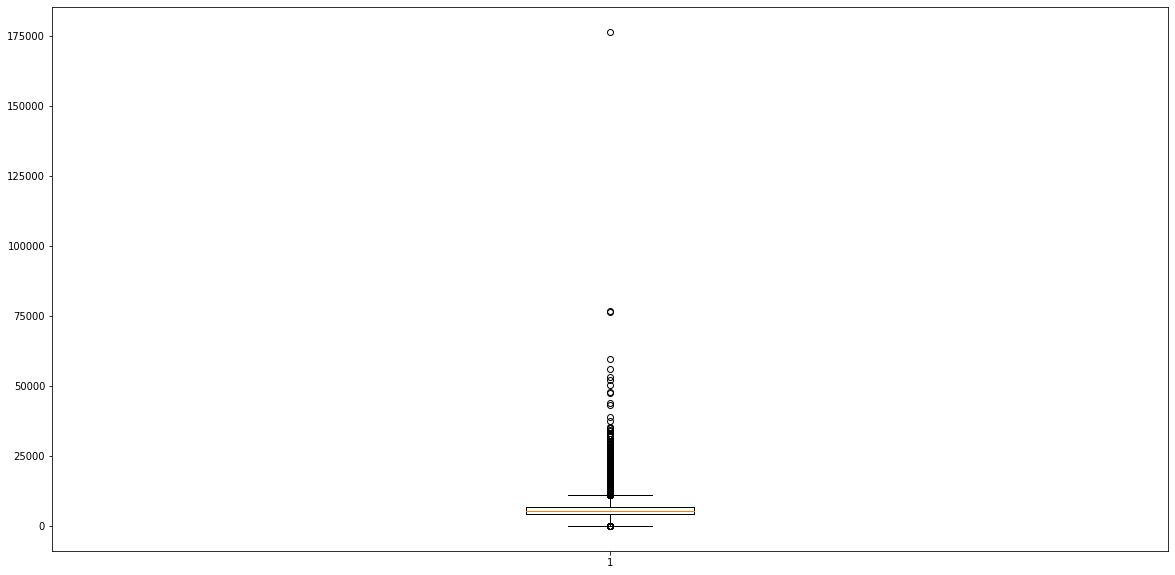

In [46]:
plt.boxplot(df3.Pricepersqft)

In [47]:
# Remove datapoints beyond mean and 1 standard deviation for each location
def remove_outliers(df):
  df_out= pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m= np.mean(subdf.Pricepersqft)
    sd = np.std(subdf.Pricepersqft)
    reduceddf = subdf[(subdf.Pricepersqft>(m-sd))&(subdf.Pricepersqft<(m+sd))]
    df_out= pd.concat([df_out,reduceddf], ignore_index=True)
  return df_out



In [48]:
df4= remove_outliers(df3)

In [49]:
df4.Pricepersqft.describe()

count    10267.000000
mean      5658.217591
std       2267.367112
min         33.210897
25%       4243.593599
50%       5175.159236
75%       6428.571429
max      24509.803922
Name: Pricepersqft, dtype: float64

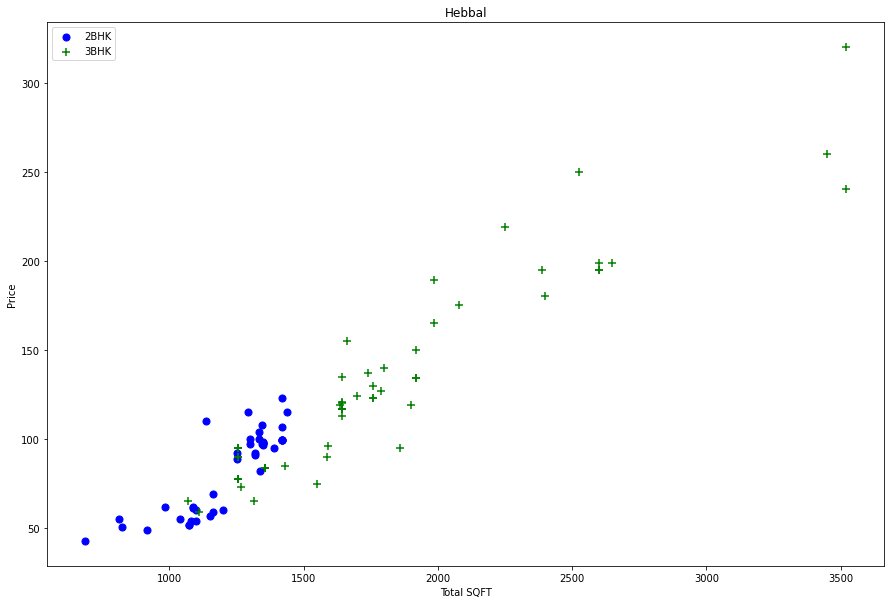

In [50]:
def plt_scatter_chart(df,location):
  bhk2=df[(df.location==location)&(df.bhk==2)]
  bhk3=df[(df.location==location)&(df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.TotalSqftAct,bhk2.price, color='blue',label='2BHK',s=50)
  plt.scatter(bhk3.TotalSqftAct,bhk3.price, color='green',marker="+",label='3BHK',s=50)
  plt.xlabel("Total SQFT")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
plt_scatter_chart(df4,"Hebbal")

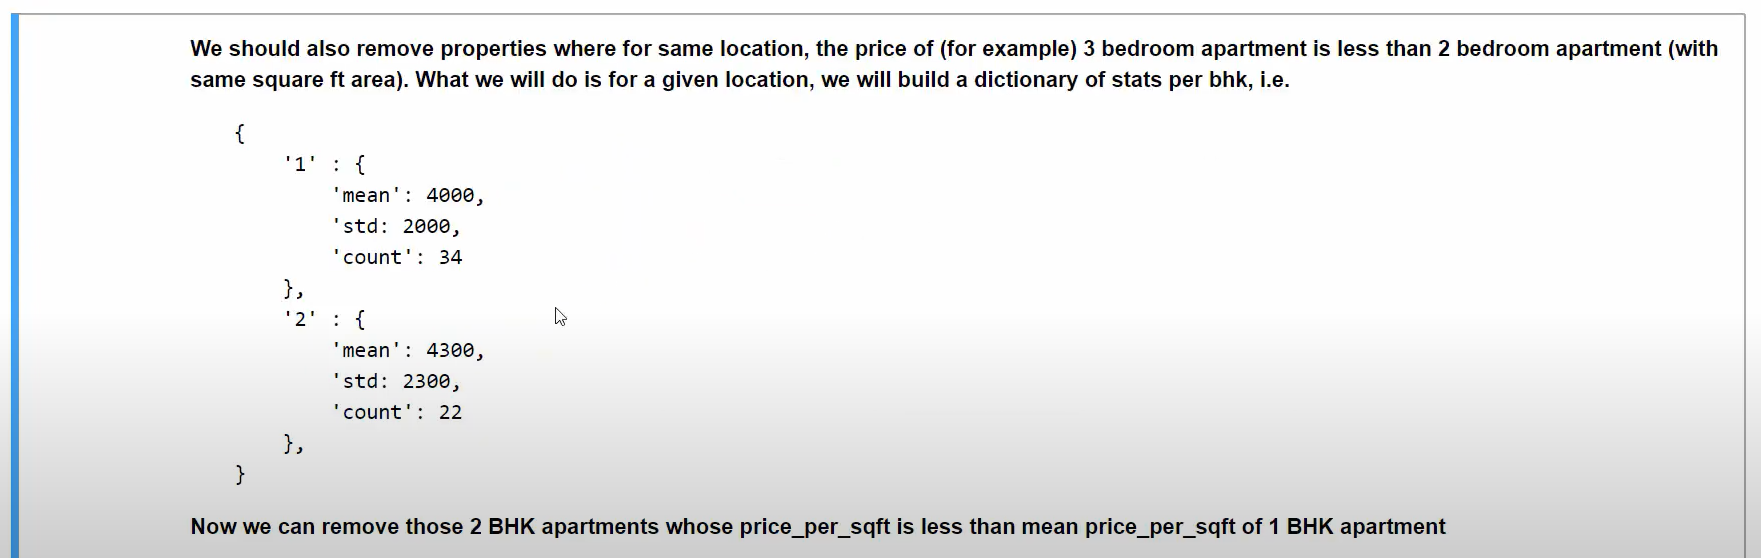

In [51]:
# removing those 2bhks which has values less than 1 bhk in terms of price per sqft
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats={}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.Pricepersqft),
          'stddev':np.std(bhk_df.Pricepersqft),
          'count':bhk_df.shape[0]
      }
      for bhk, bhk_df in location_df.groupby('bhk'):
        stats= bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Pricepersqft<(stats['mean'])].index.values)
      return df.drop(exclude_indices,axis='index')



In [54]:
df5= remove_bhk_outliers(df4)
df5.shape

(10267, 7)

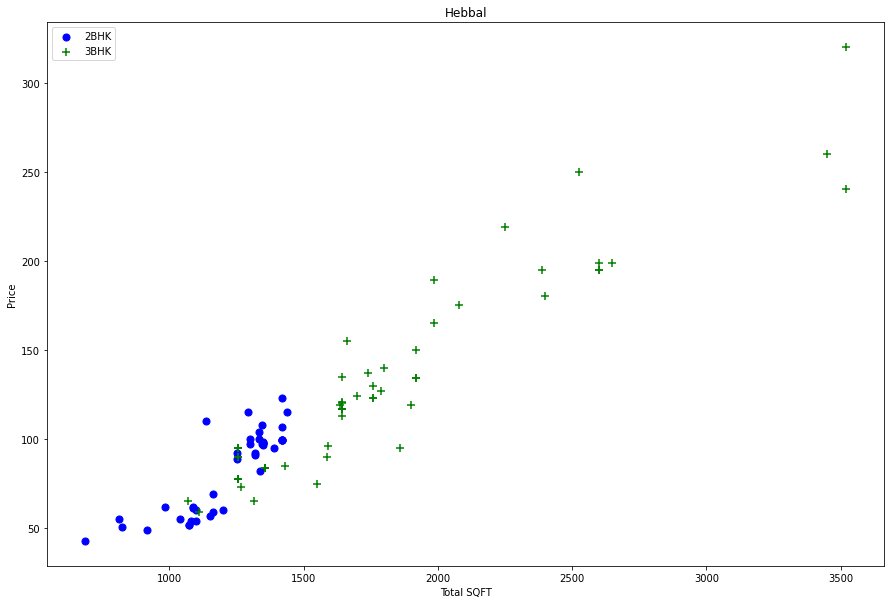

In [53]:
plt_scatter_chart(df5,"Hebbal")